First Tasks: Data Preprocessing and Cleaning:
Data Preprocessing: Execute the following tasks on the provided datasets: You need to perform Data Preprocessing and preparation on the available datasets as mentioned below:
1. Data Exploration.
2. Data Cleaning.
3. Data Encoding.
4. Data Labelling.

Second Tasks: Building Machine Learning Models (Only For ML and Data Scientist team)
1. Perform regression and classification Models:
2. Generate reports highlighting Confusion matrix and accuracy results.

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [8]:
# Replace 'your_file.csv' with the path to your CSV file
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [7]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


First few rows:
    Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOpti

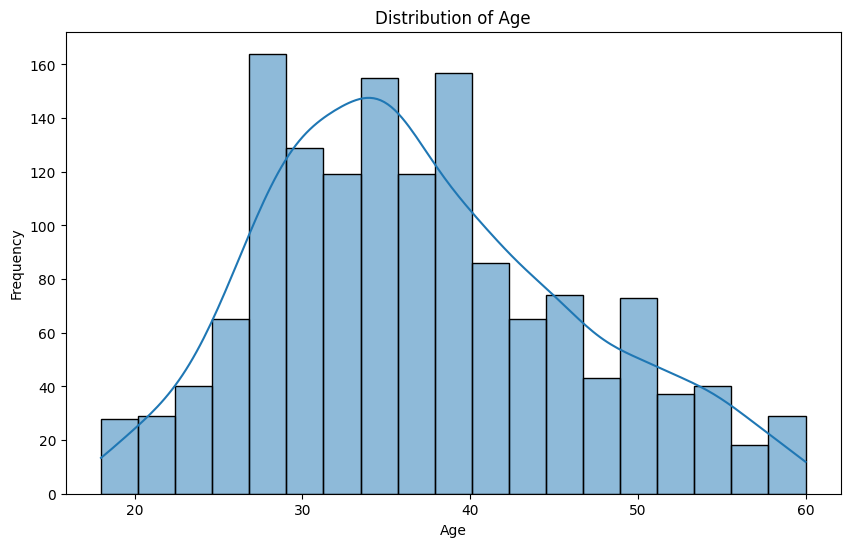

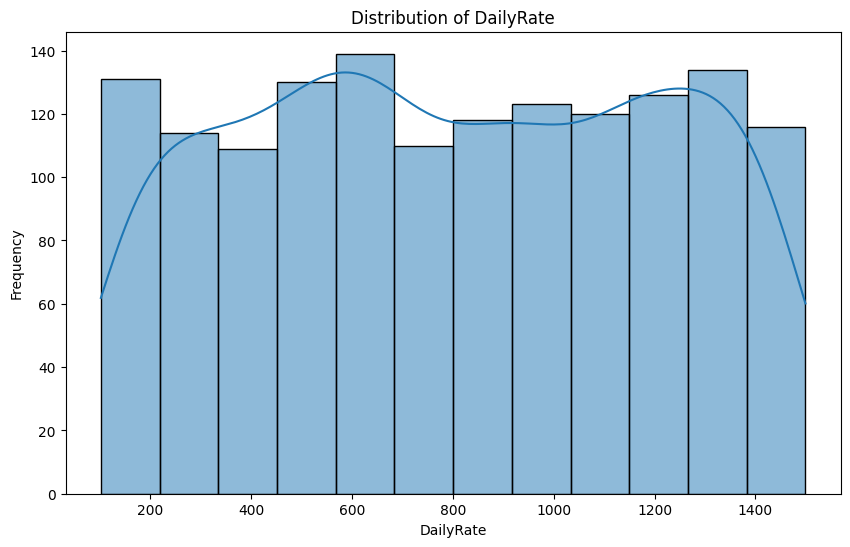

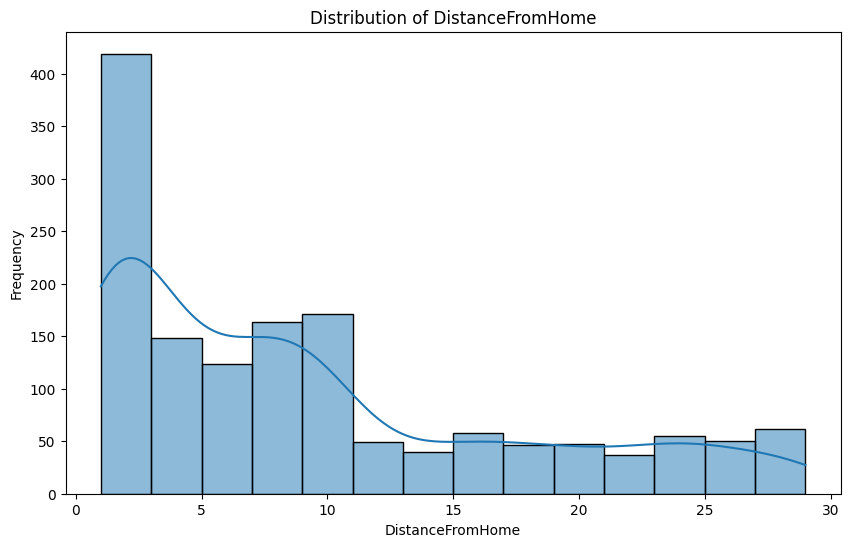

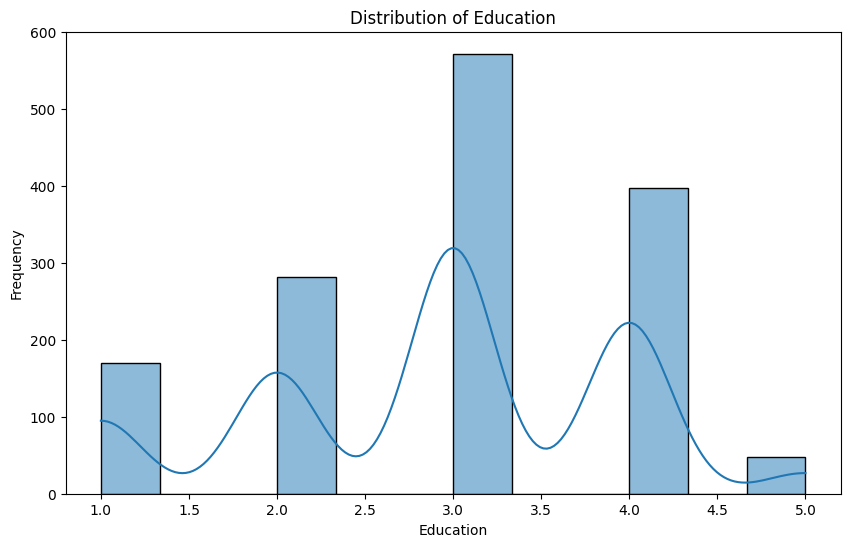

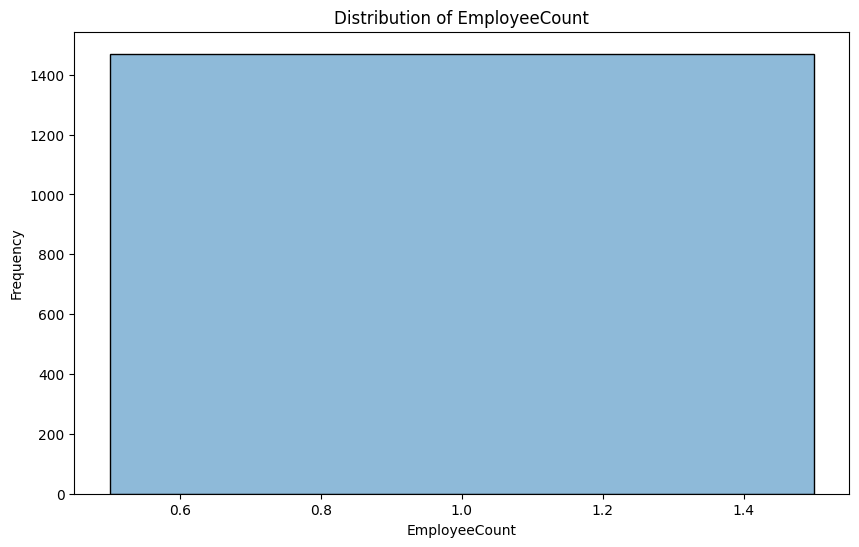

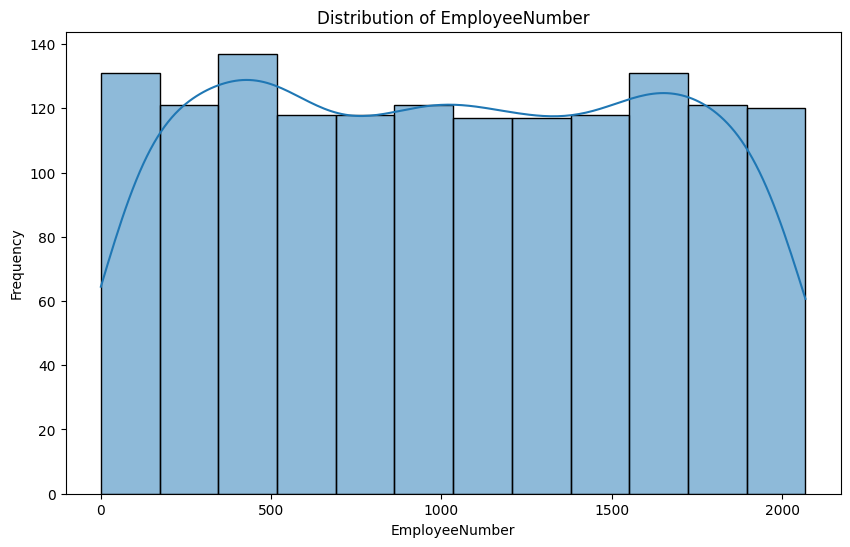

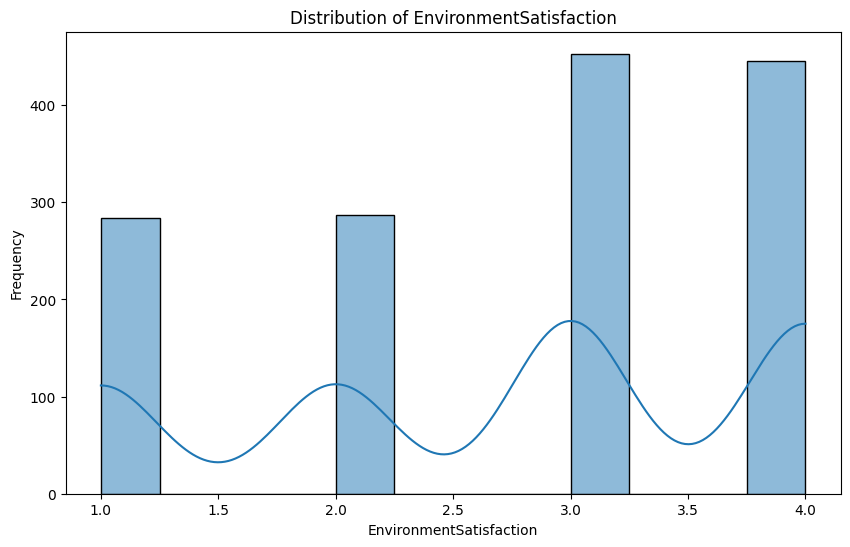

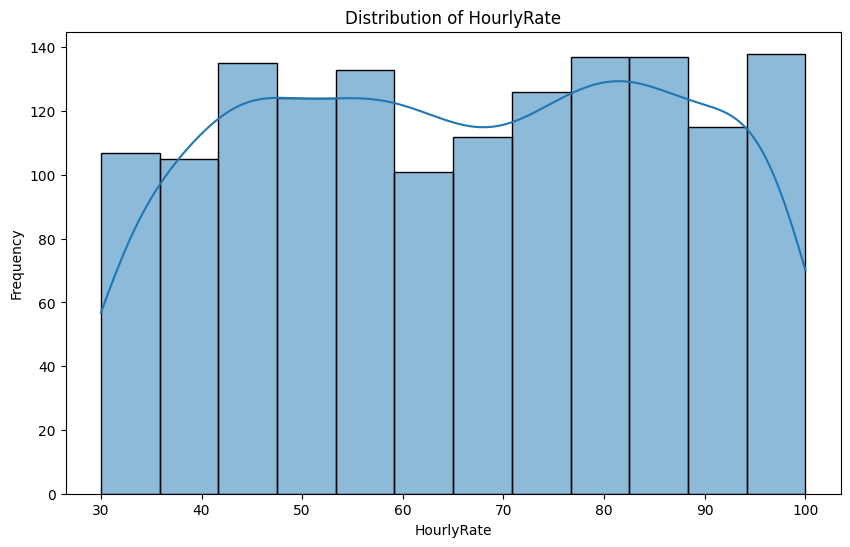

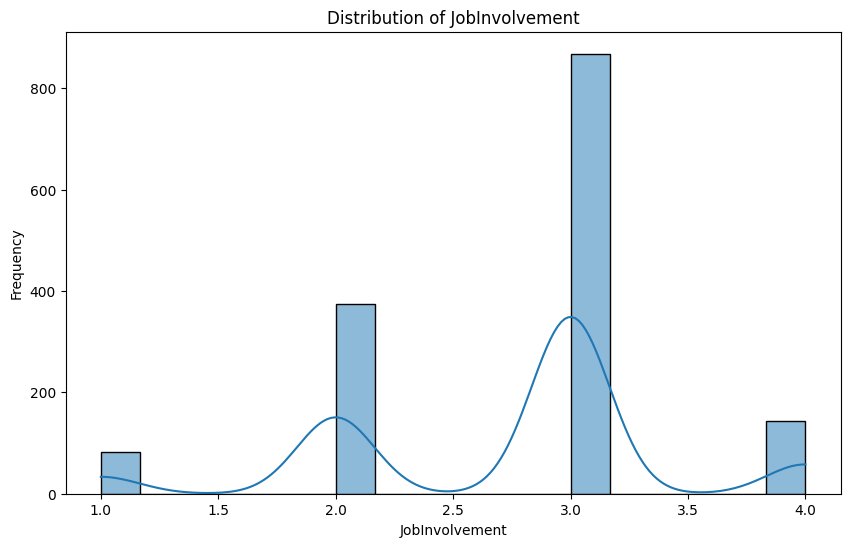

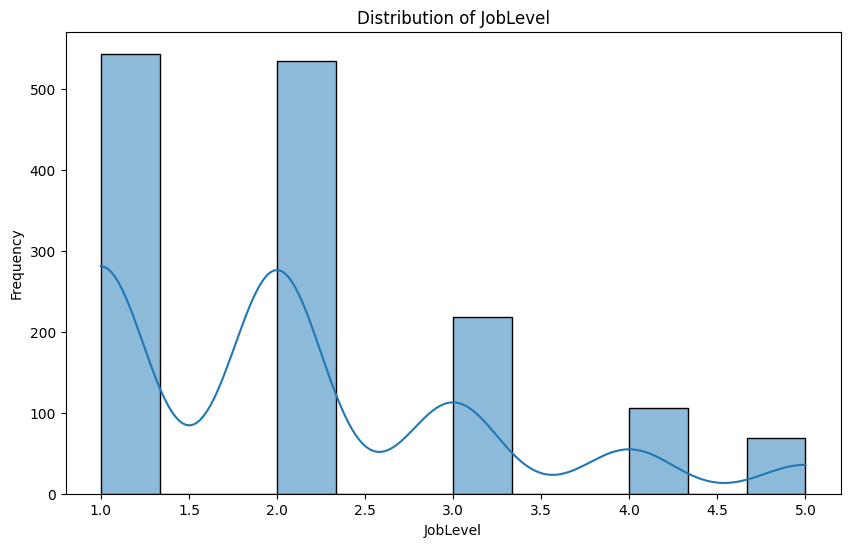

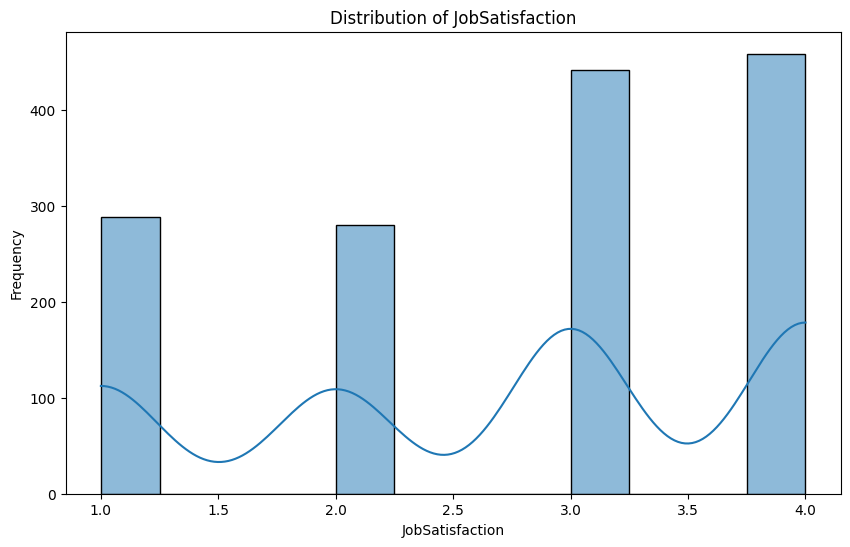

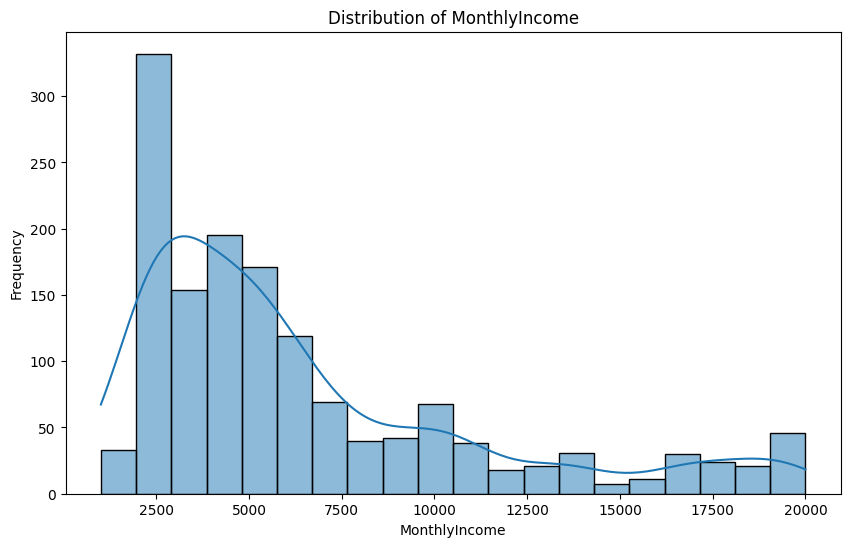

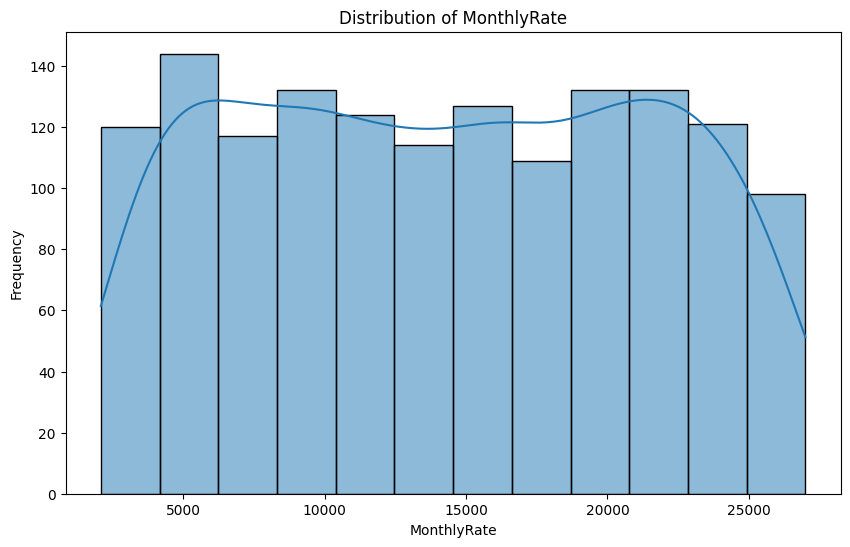

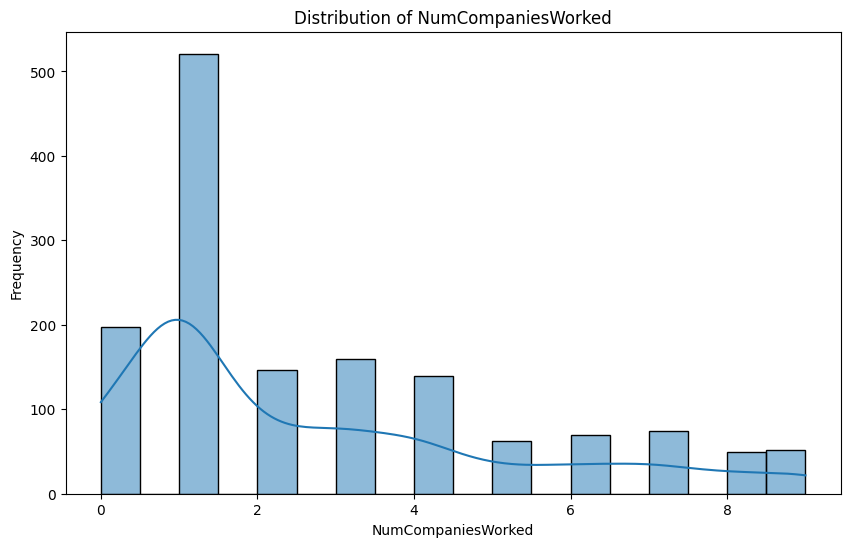

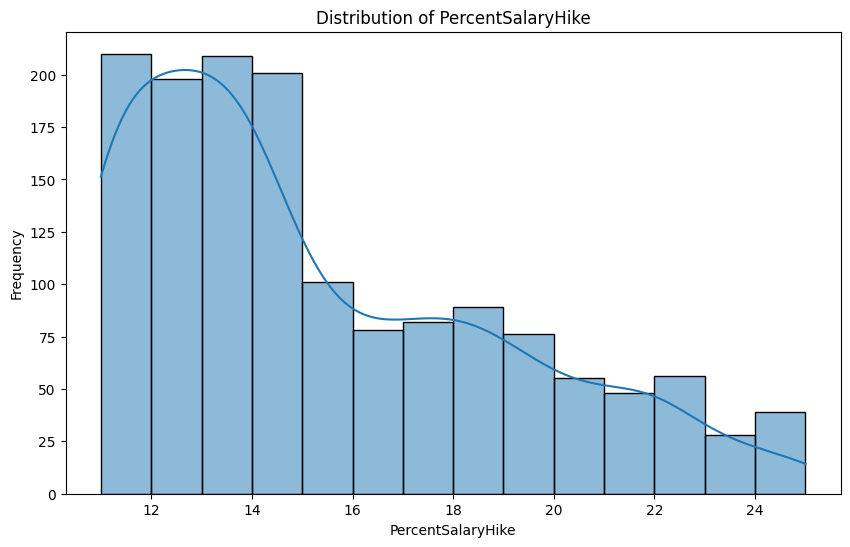

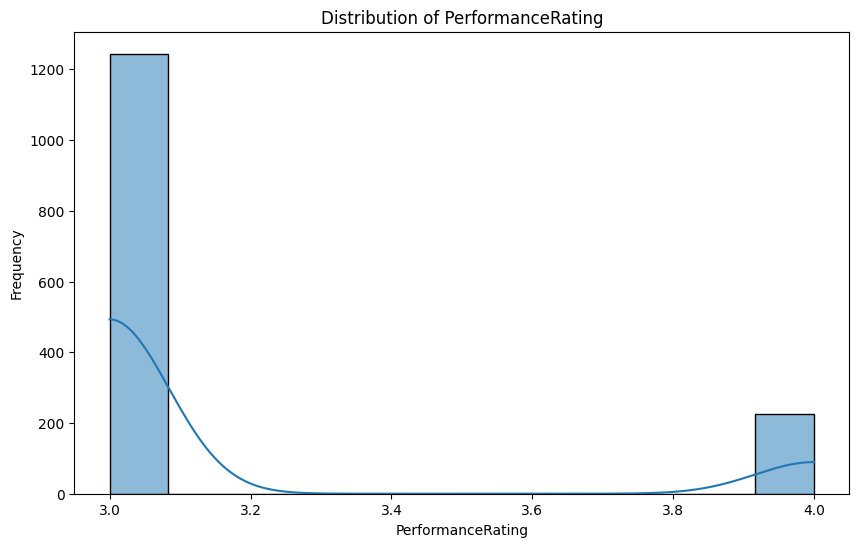

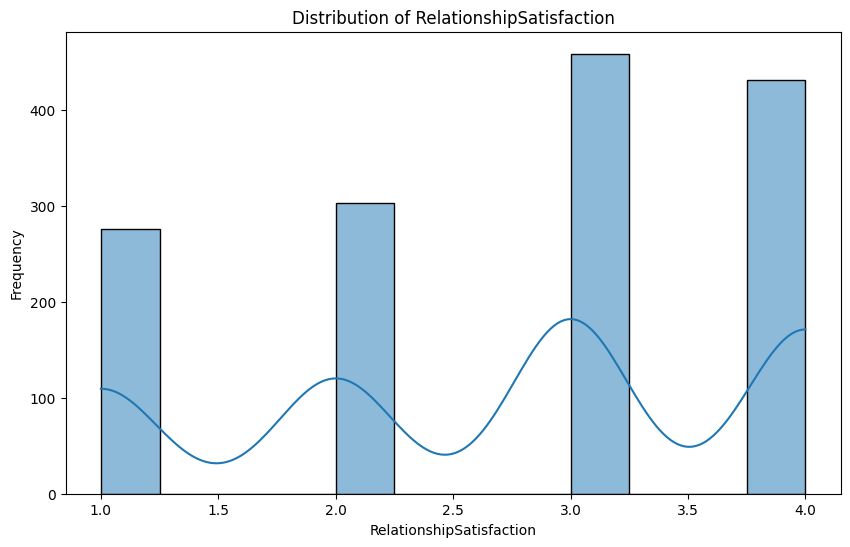

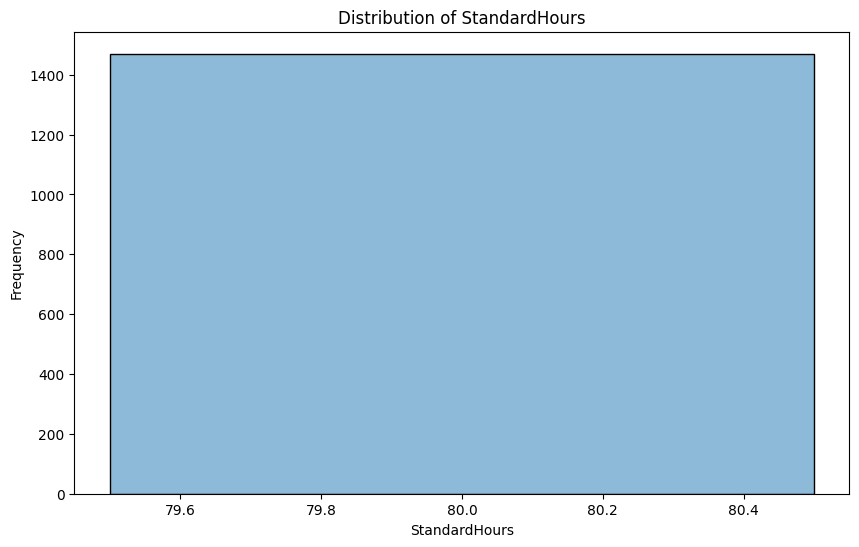

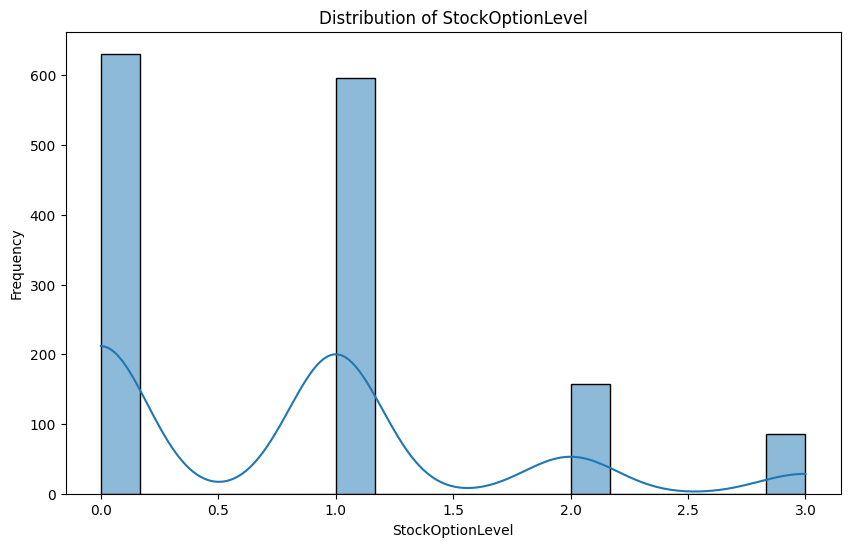

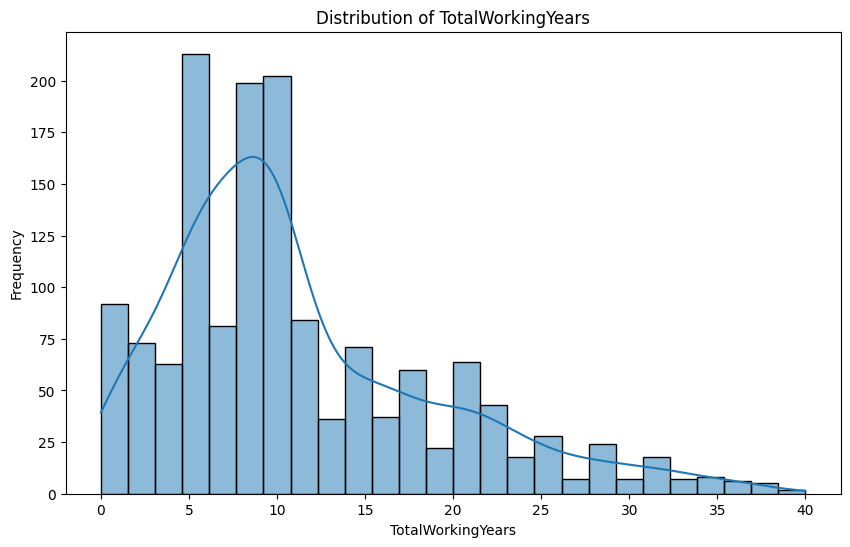

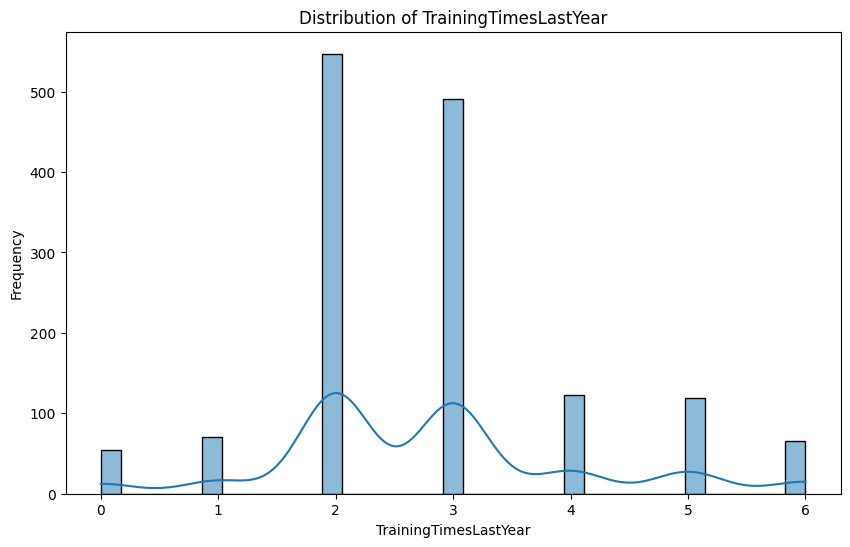

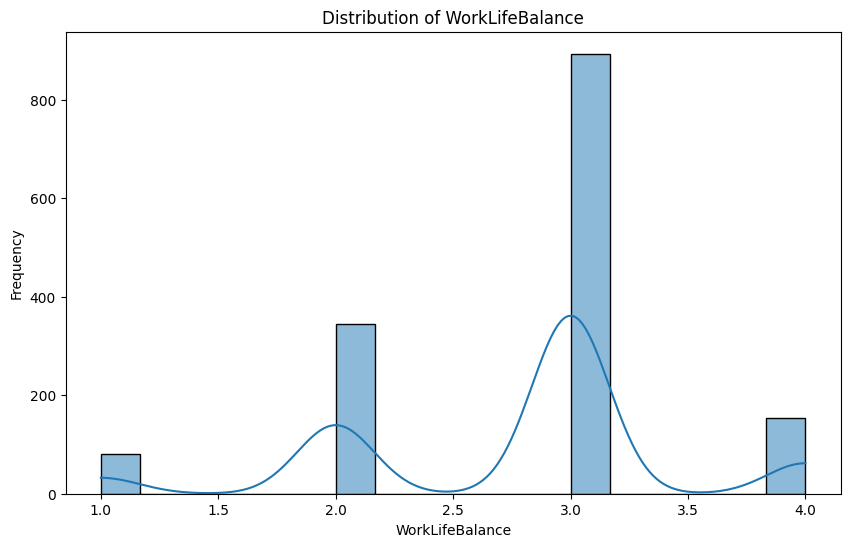

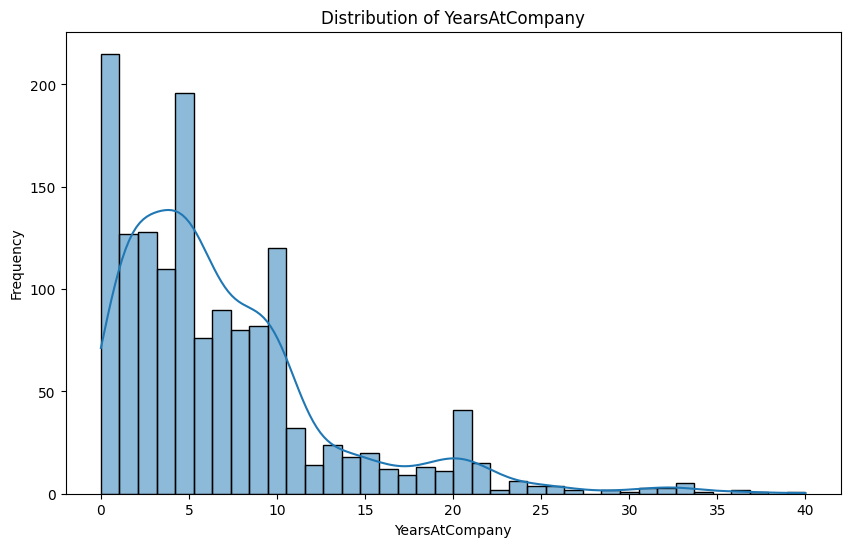

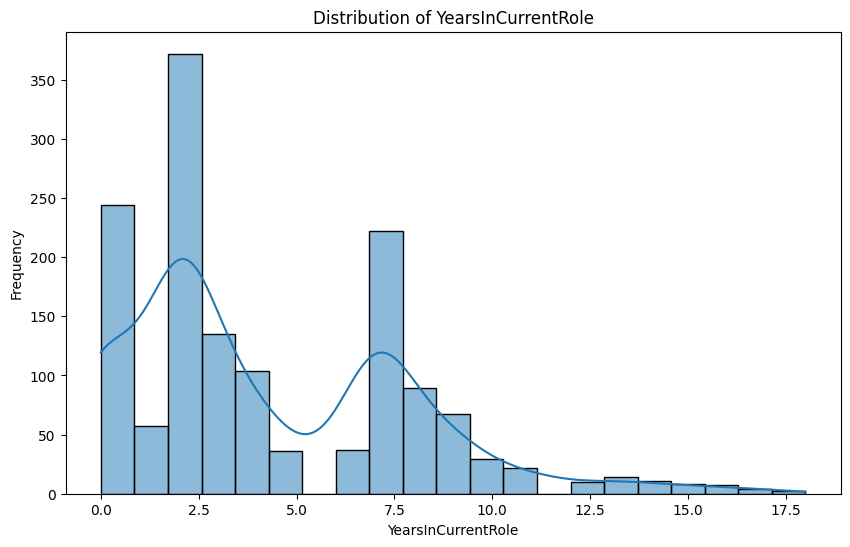

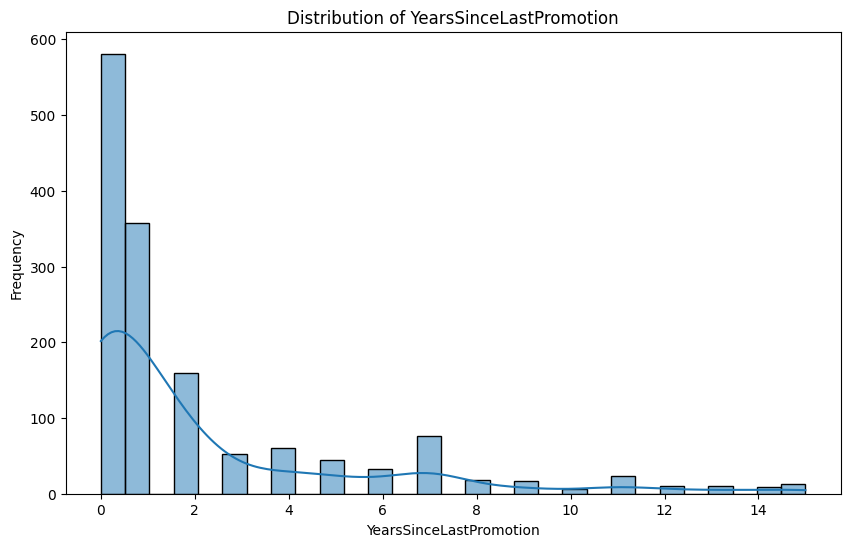

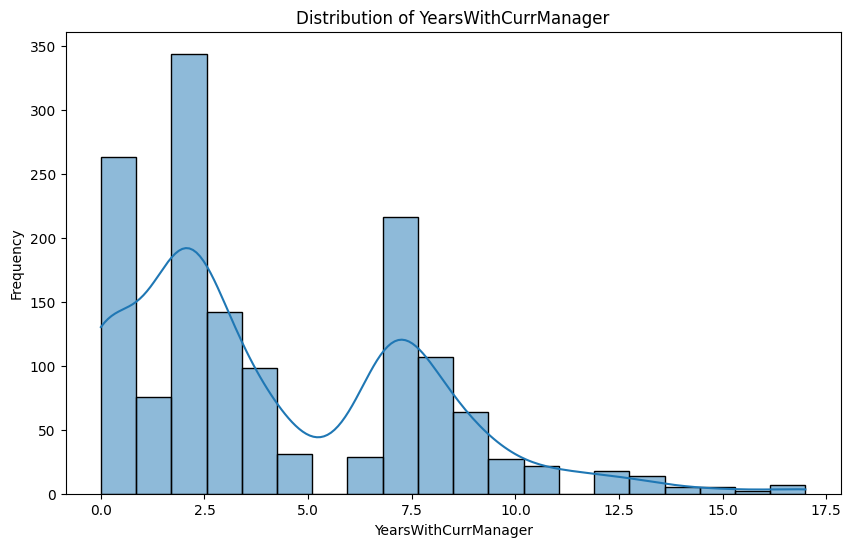


Correlation matrix:
                                Age  DailyRate  DistanceFromHome  Education  \
Age                       1.000000   0.010661         -0.001686   0.208034   
DailyRate                 0.010661   1.000000         -0.004985  -0.016806   
DistanceFromHome         -0.001686  -0.004985          1.000000   0.021042   
Education                 0.208034  -0.016806          0.021042   1.000000   
EmployeeCount                  NaN        NaN               NaN        NaN   
EmployeeNumber           -0.010145  -0.050990          0.032916   0.042070   
EnvironmentSatisfaction   0.010146   0.018355         -0.016075  -0.027128   
HourlyRate                0.024287   0.023381          0.031131   0.016775   
JobInvolvement            0.029820   0.046135          0.008783   0.042438   
JobLevel                  0.509604   0.002966          0.005303   0.101589   
JobSatisfaction          -0.004892   0.030571         -0.003669  -0.011296   
MonthlyIncome             0.497855   0.007

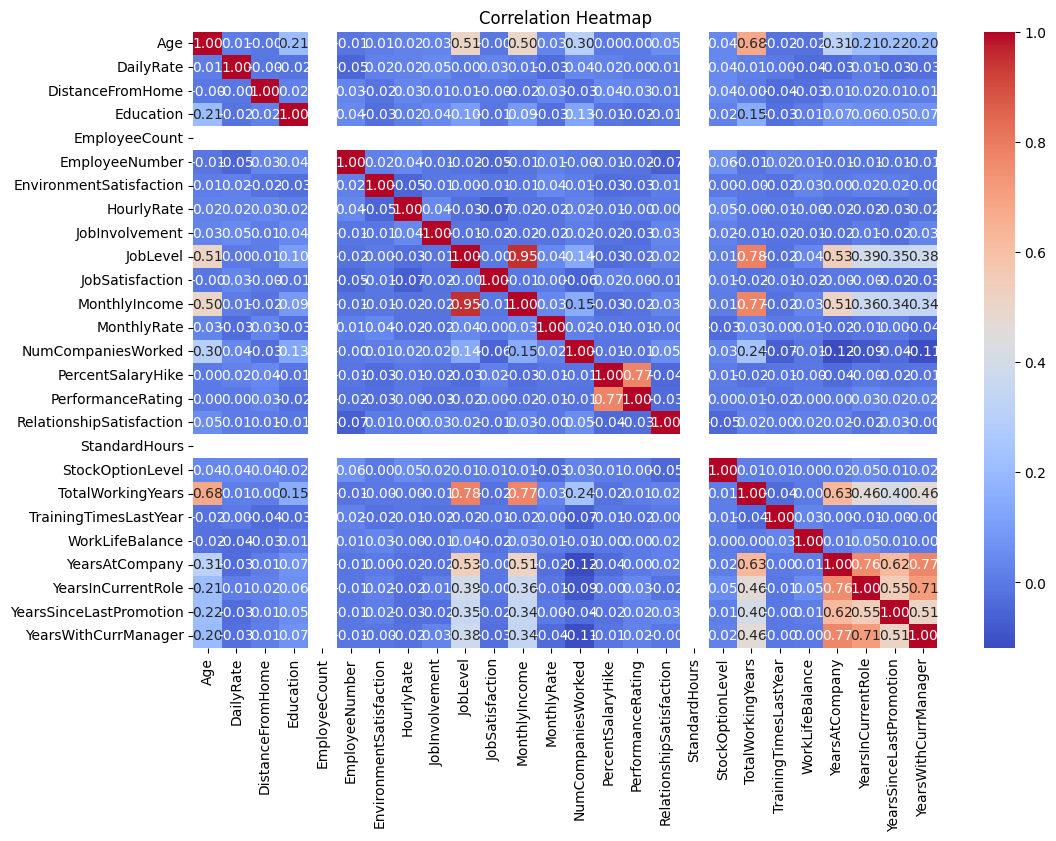


Number of duplicate rows:
 0


In [11]:
# Initial inspection
print("First few rows:\n", df.head())
print("\nLast few rows:\n", df.tail())
print("\nDataFrame info:\n", df.info())
print("\nDescriptive statistics:\n", df.describe())

# Check for missing values
print("\nMissing values:\n", df.isnull().sum())
print("\nPercentage of missing values:\n", (df.isnull().sum() / len(df)) * 100)

# Unique values and value counts for categorical columns
for column in df.select_dtypes(include=['object']).columns:
    print(f"\nUnique values in {column}:\n", df[column].unique())
    print(f"\nValue counts in {column}:\n", df[column].value_counts())

# Distribution of numerical columns
num_cols = df.select_dtypes(include=['number']).columns
for col in num_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col].dropna(), kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

# Select only numerical columns for correlation
numerical_df = df.select_dtypes(include=['number'])

# Correlation matrix
corr_matrix = numerical_df.corr()  # Calculate correlation on numerical data only
print("\nCorrelation matrix:\n", corr_matrix)

# Heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# Checking for duplicates
print("\nNumber of duplicate rows:\n", df.duplicated().sum())

In [12]:
df['Age'].fillna(df['Age'].mean(), inplace=True)

In [13]:
df.dropna(subset=['PerformanceRating'], inplace=True)

In [17]:
Q1 = df['MonthlyIncome'].quantile(0.25)
Q3 = df['MonthlyIncome'].quantile(0.75) # Fixed indentation
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR
df['MonthlyIncome'] = np.where(df['MonthlyIncome'] > upper_bound, upper_bound, df['MonthlyIncome'])

In [18]:
df['Department'] = df['Department'].replace({'Sales ':'Sales'})

In [19]:
categorical_cols = df.select_dtypes(include=['object']).columns
print(categorical_cols)

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')


In [27]:
# One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=['Department', 'BusinessTravel', 'Gender'], drop_first=True)

# Label Encoding for ordinal columns
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# Loop through all object type columns and label encode them
for col in df_encoded.select_dtypes(include=['object']).columns:
    df_encoded[col] = le.fit_transform(df_encoded[col])

# ... (rest of your code)

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Assuming 'Attrition' is your target variable and df_encoded is your preprocessed dataframe
X = df_encoded.drop('Attrition', axis=1)
y = df_encoded['Attrition']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8673469387755102

Confusion Matrix:
 [[255   0]
 [ 39   0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.87      1.00      0.93       255
           1       0.00      0.00      0.00        39

    accuracy                           0.87       294
   macro avg       0.43      0.50      0.46       294
weighted avg       0.75      0.87      0.81       294



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels wit